In [127]:
from tensorflow import keras

mnist = keras.datasets.mnist.load_data()
type(mnist)


tuple

In [128]:
len(mnist)

2

In [129]:
print(mnist.count)

<built-in method count of tuple object at 0x1748aacc0>


In [130]:
print(mnist.index)

<built-in method index of tuple object at 0x1748aacc0>


In [131]:
help(mnist)

Help on tuple object:

class tuple(object)
 |  tuple(iterable=(), /)
 |  
 |  Built-in immutable sequence.
 |  
 |  If no argument is given, the constructor returns an empty tuple.
 |  If iterable is specified the tuple is initialized from iterable's items.
 |  
 |  If the argument is a tuple, the return value is the same object.
 |  
 |  Built-in subclasses:
 |      asyncgen_hooks
 |      UnraisableHookArgs
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(self, key, /)
 |      Return self[key].
 |  
 |  __getnewargs__(self, /)
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __iter__(self, /)
 |

In [132]:
type(mnist)

tuple

In [133]:
(X_train, y_train), (X_test, y_test) = mnist

In [134]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [135]:
X_train.max(), X_test.min()

(255, 0)

In [136]:
X_train[:3]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [137]:
max = X_train[[X_train.max()]]
max.shape

(1, 28, 28)

### d) plot min and max image

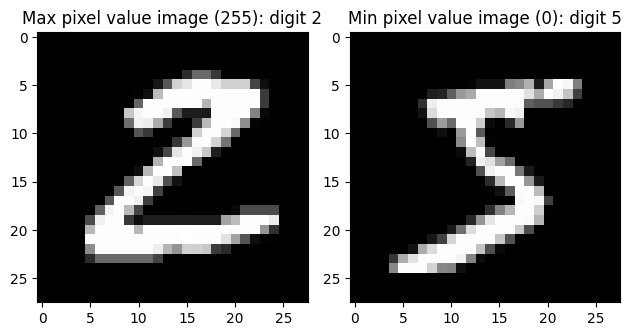

In [138]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

max_idx, min_idx = np.argmax(X_train), np.argmin(X_train)

fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot the maximum value image
ax1.imshow(X_train[max_idx], cmap='gray')
ax1.set_title(f"Max pixel value image ({X_train[max_idx].max()}): digit {y_train[max_idx]}")

# Plot the minimum value image
ax2.imshow(X_train[min_idx], cmap='gray')
ax2.set_title(f"Min pixel value image ({X_train[min_idx].min()}): digit {y_train[min_idx]}")

plt.tight_layout()
# Show the plot
plt.show()

### e) plot 20 sample images

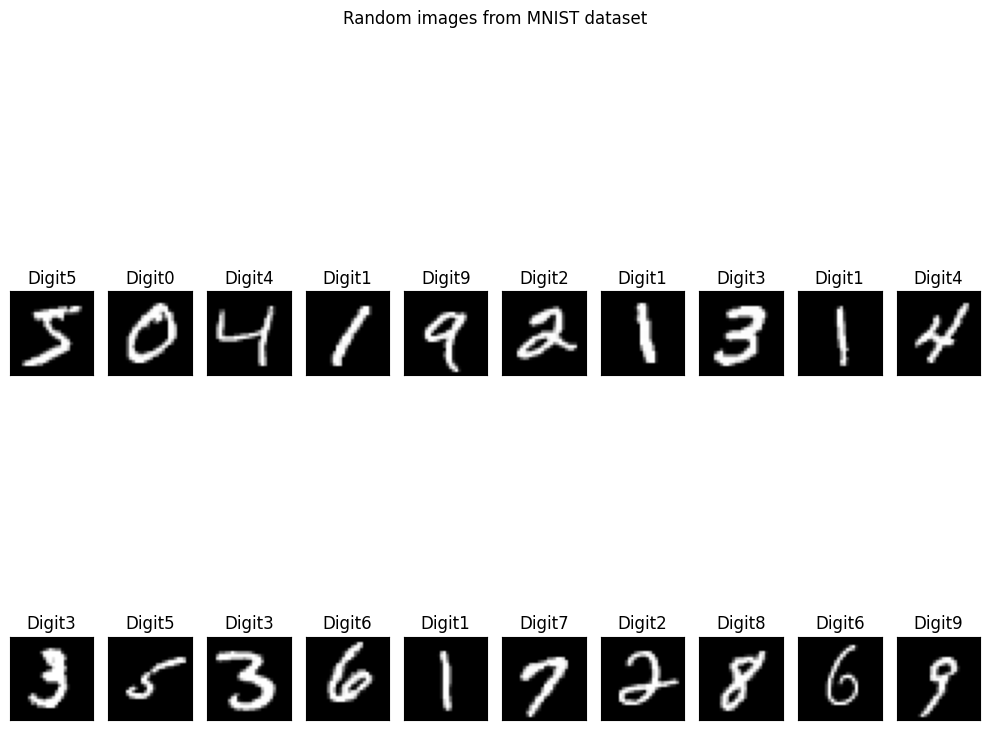

In [139]:
# Generate 20 random indices
indices = np.random.choice(X_train.shape[0], 20, replace=False)

#creates a figure with 20 subplots arranged in 5X4
fig, ax = plt.subplots(nrows=2, ncols=10, figsize=(10, 10))
axes = ax.flatten()


for index, image in enumerate(indices):
    axes[index].imshow(X_train[index], cmap='gray')
    axes[index].set_title(f"Digit{y_train[index]}")
    
    axes[index].set_xticks([])
    axes[index].set_yticks([])
    
fig.suptitle("Random images from MNIST dataset")

plt.tight_layout()

### f) 

In [140]:
X_train.shape

(60000, 28, 28)

In [141]:
example_image = X_train[0]

# Reshape the image to a 2D shape
reshaped_image = example_image.reshape((example_image.shape[0], -1))
reshaped_image.shape


(28, 28)

In [142]:
# Get the number of samples and the original image dimensions
num_samples, img_rows, img_cols = X_train.shape

# Reshape the training data to a 2D array
x_train_2d = X_train.reshape(num_samples, img_rows * img_cols)

# Print the original and reshaped shapes
print("Original shape:", X_train.shape)
print("Reshaped shape:", x_train_2d.shape)

Original shape: (60000, 28, 28)
Reshaped shape: (60000, 784)


In [143]:
y_train.shape

(60000,)

### 1.

In [144]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_train_2d, y_train, test_size=0.167, random_state=42)
print(X_train.shape,y_train.shape, X_val.shape, y_val.shape)


(49980, 784) (49980,) (10020, 784) (10020,)
